In [6]:
pip install matplotlib

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "password",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1.1: Find the division-wise total_sale_price joining fact table and respective dimension table

In [5]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [9]:
df_q1_1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1_1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [10]:
df_q1_1 = df_q1_1.drop(7)
df_q1_1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [12]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [13]:
changetype(df_q1_1)
df_q1_1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [14]:
df_q1_1 = df_q1_1 .set_index(['division'])
df_q1_1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

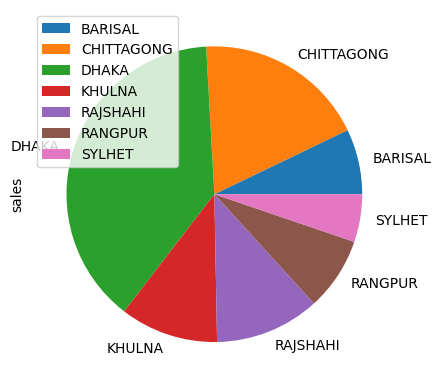

In [15]:
df_q1_1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

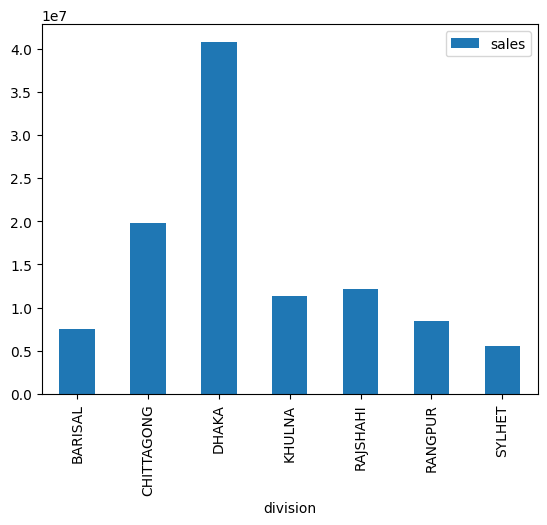

In [16]:
plt.figure(figsize=(10,5))
df_q1_1.plot.bar(y='sales')

# Q1.2: Find the district-wise total_sale_price joining fact table and respective dimension table

In [17]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.store_dim s on s.store_key=f.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [18]:
df_q1_2 = pd.DataFrame(records, columns=['district', 'sales'])
df_q1_2

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [19]:
df_q1_2 = df_q1_2.drop(64)
df_q1_2

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [20]:
changetype(df_q1_2)
df_q1_2

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [21]:
df_q1_2 = df_q1_2 .set_index(['district'])
df_q1_2

,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SIRAJGANJ,1295100.75
SUNAMGANJ,1593774.00
SYLHET,1727717.25


<Axes: ylabel='sales'>

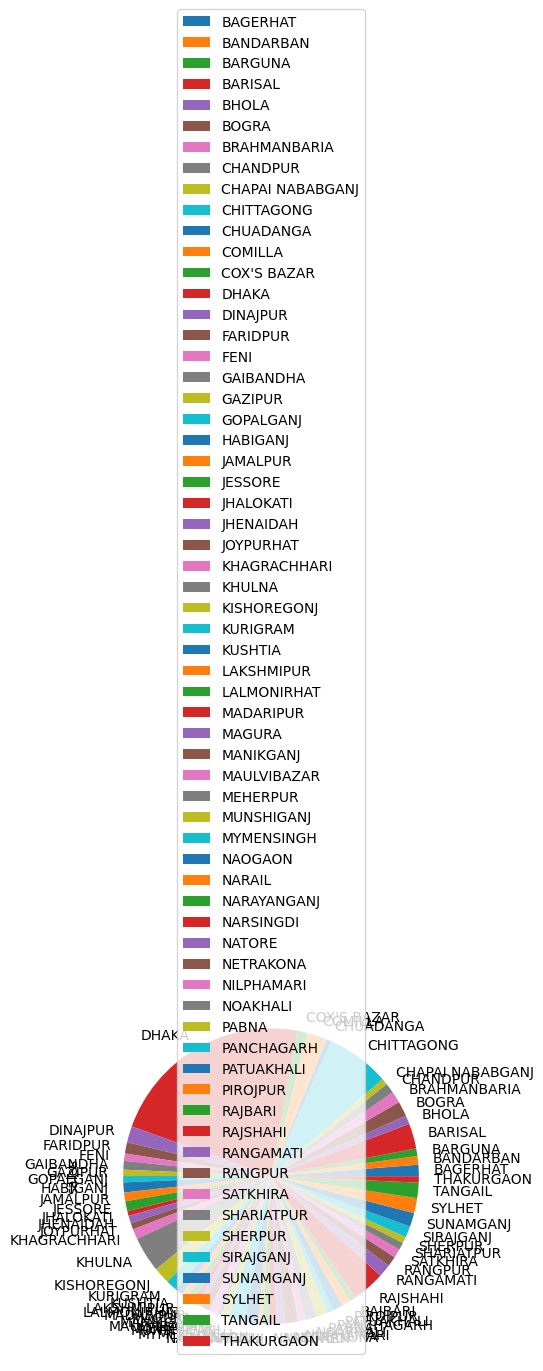

In [22]:
df_q1_2.plot.pie(y='sales')


<Axes: xlabel='district'>

<Figure size 1000x500 with 0 Axes>

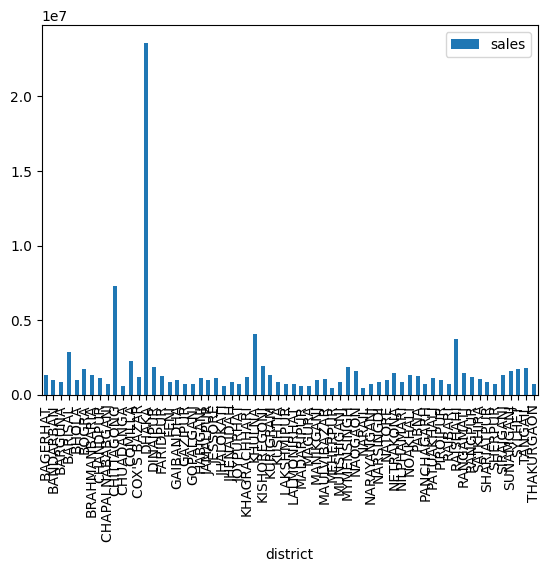

In [23]:
plt.figure(figsize=(10, 5))
df_q1_2.plot.bar(y='sales')

# Q1.3: Find the year-wise total_sale_price joining fact table and respective dimension table

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "GROUP BY CUBE(t.year) " \
                "ORDER BY t.year"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [25]:
df_q1_3 = pd.DataFrame(records, columns=['year', 'sales'])
df_q1_3

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [26]:
df_q1_3 = df_q1_3.drop(8)
df_q1_3

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [27]:
changetype(df_q1_3)
df_q1_3

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [28]:
df_q1_3 = df_q1_3.set_index(['year'])
df_q1_3

,sales
year,
2014.0,14334731.25
2015.0,15095720.25
2016.0,14976508.25
2017.0,15015806.00
2018.0,15108197.25
2019.0,14949510.25
2020.0,15037190.25
2021.0,883772.25


<Axes: ylabel='sales'>

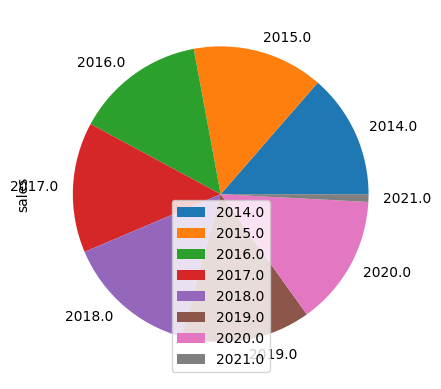

In [29]:
df_q1_3.plot.pie(y='sales')

<Axes: xlabel='year'>

<Figure size 1000x500 with 0 Axes>

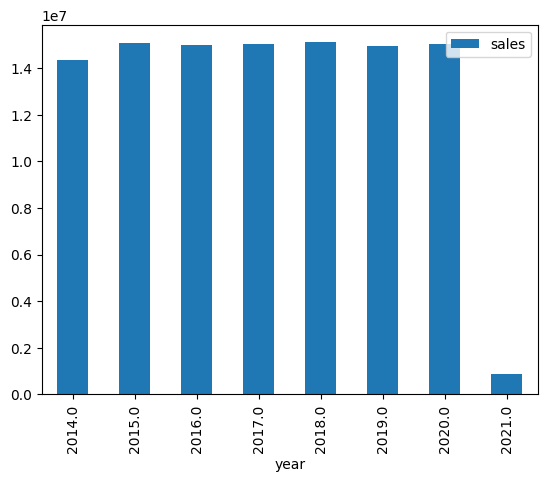

In [30]:
plt.figure(figsize=(10,5))
df_q1_3.plot.bar(y='sales')

# Q1.4: Find the month-wise total_sale_price joining fact table and respective dimension table

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.month, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "GROUP BY CUBE(t.month) " \
                "ORDER BY t.month " 
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(1, Decimal('9042244.00')),
 (2, Decimal('8073877.50')),
 (3, Decimal('8939152.00')),
 (4, Decimal('8504634.75')),
 (5, Decimal('9078002.50')),
 (6, Decimal('8556853.00')),
 (7, Decimal('9046580.00')),
 (8, Decimal('8929475.25')),
 (9, Decimal('8724326.50')),
 (10, Decimal('8902783.75')),
 (11, Decimal('8680026.00')),
 (12, Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [32]:
df_q1_4 = pd.DataFrame(records, columns=['month', 'sales'])
df_q1_4

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [33]:
df_q1_4 = df_q1_4.drop(12)
df_q1_4

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [34]:
changetype(df_q1_4)
df_q1_4

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [35]:
df_q1_4 = df_q1_4.set_index(['month'])
df_q1_4

,sales
month,
1.0,9042244.00
2.0,8073877.50
3.0,8939152.00
4.0,8504634.75
5.0,9078002.50
6.0,8556853.00
7.0,9046580.00
8.0,8929475.25
9.0,8724326.50


<Axes: ylabel='sales'>

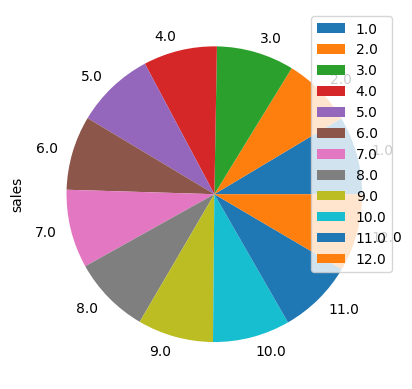

In [36]:
df_q1_4.plot.pie(y='sales')

<Axes: xlabel='month'>

<Figure size 1000x500 with 0 Axes>

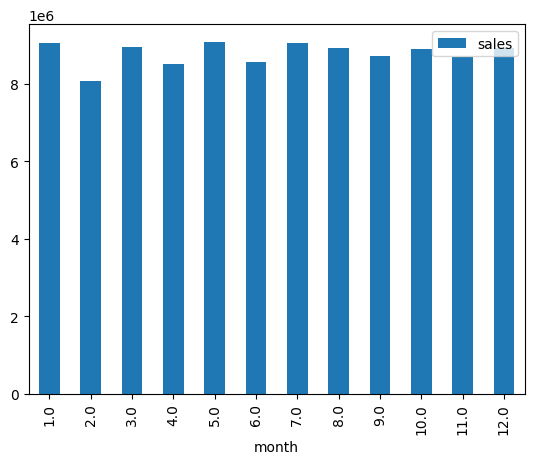

In [37]:
plt.figure(figsize=(10,5))
df_q1_4.plot.bar(y='sales')

# Q2.1: Find the customer-wise total_sale_price joining fact table and respective dimension table

In [38]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT f2.customer_key, SUM(f2.total_price) " \
                "FROM star_schema.fact_table f1 " \
                "JOIN star_schema.fact_table f2 on f2.customer_key=f1.customer_key " \
                "GROUP BY CUBE(f2.customer_key) " \
                "ORDER BY f2.customer_key "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('C000001', Decimal('684269.50')),
 ('C000002', Decimal('1135626.50')),
 ('C000003', Decimal('1308987.00')),
 ('C000004', Decimal('1573766.00')),
 ('C000005', Decimal('1176471.00')),
 ('C000006', Decimal('1410214.75')),
 ('C000007', Decimal('1565135.00')),
 ('C000008', Decimal('1019970.00')),
 ('C000009', Decimal('1258373.50')),
 ('C000010', Decimal('1031008.00')),
 ('C000011', Decimal('1584388.50')),
 ('C000012', Decimal('755209.50')),
 ('C000013', Decimal('1004192.50')),
 ('C000014', Decimal('1656144.00')),
 ('C000015', Decimal('1296674.25')),
 ('C000016', Decimal('1214455.00')),
 ('C000017', Decimal('1042618.50')),
 ('C000018', Decimal('1398925.00')),
 ('C000019', Decimal('1561995.50')),
 ('C000020', Decimal('1501338.00')),
 ('C000021', Decimal('1012018.50')),
 ('C000022', Decimal('735827.00')),
 ('C000023', Decimal('977663.00')),
 ('C000024', Decimal('1072838.00')),
 ('C000025', Decimal('871052.00')),
 ('C000026', Decimal('1095633.00')),
 ('C000027', Decimal('1155917.50')),
 ('C00

In [41]:
df_q2_1 = pd.DataFrame(records, columns=['customer', 'sales'])
# df_q2_1 = df_q2_1.drop()
df_q2_1 = df_q2_1.set_index(['customer'])
#df_q2_1
changetype(df_q2_1)
#df_q2_1.plot.pie(y='sales')
#plt.figure(figsize=(10,5))
#df_q2_1.plot.bar(y='sales')

# Q2.2: Find the bank-wise total_sale_price joining fact table and respective dimension table

In [42]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.bank_name, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.bank_name) " \
                "ORDER BY t.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [43]:
df_q2_2 = pd.DataFrame(records, columns=['bank', 'sales'])
df_q2_2

,bank,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [44]:
df_q2_2 = df_q2_2.drop(39)
df_q2_2

,bank,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [45]:
df_q2_2 = df_q2_2.set_index(['bank'])
df_q2_2

,sales
bank,
AB Bank Limited,2728515.50
Bangladesh Commerce Bank Limited,2730999.25
Bank Asia Limited,2687142.75
Bengal Commercial Bank Ltd,2704554.25
Bkash,2689352.50
BRAC Bank Limited,2705795.75
Citizens Bank Limited,2723215.25
City Bank Limited,2713952.50
Community Bank Bangladesh Limited,2685751.50


In [46]:
changetype(df_q2_2)
df_q2_2

,sales
bank,
AB Bank Limited,2728515.50
Bangladesh Commerce Bank Limited,2730999.25
Bank Asia Limited,2687142.75
Bengal Commercial Bank Ltd,2704554.25
Bkash,2689352.50
BRAC Bank Limited,2705795.75
Citizens Bank Limited,2723215.25
City Bank Limited,2713952.50
Community Bank Bangladesh Limited,2685751.50


<Axes: ylabel='sales'>

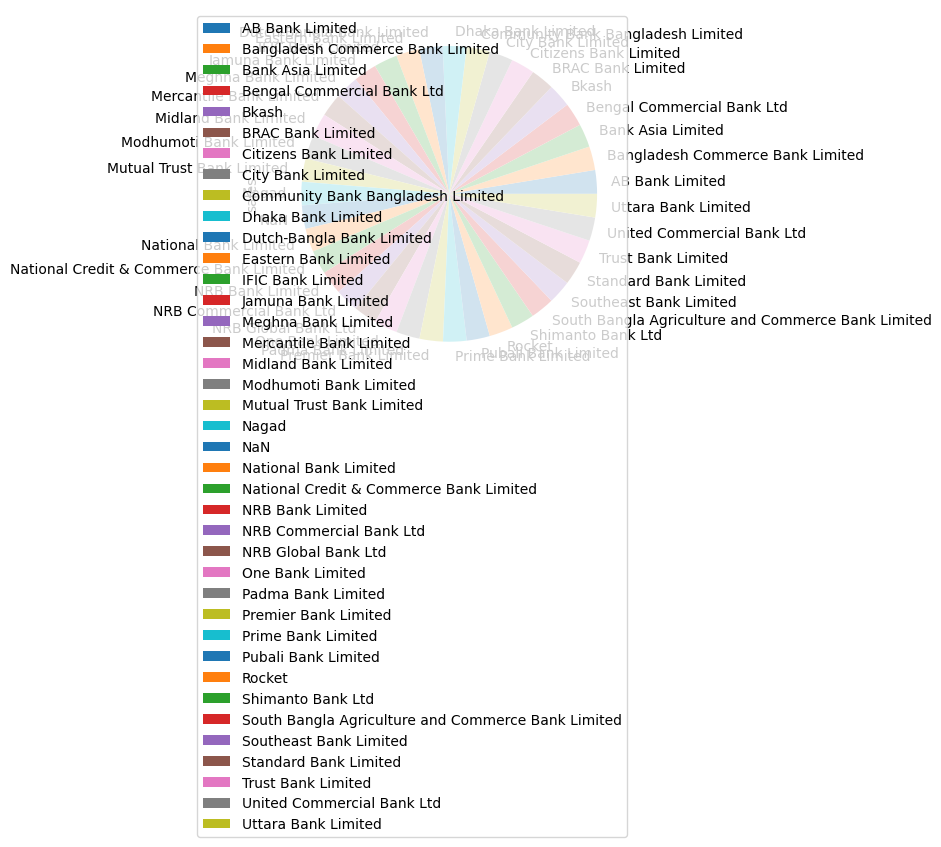

In [47]:
df_q2_2.plot.pie(y='sales')

<Axes: xlabel='bank'>

<Figure size 1000x500 with 0 Axes>

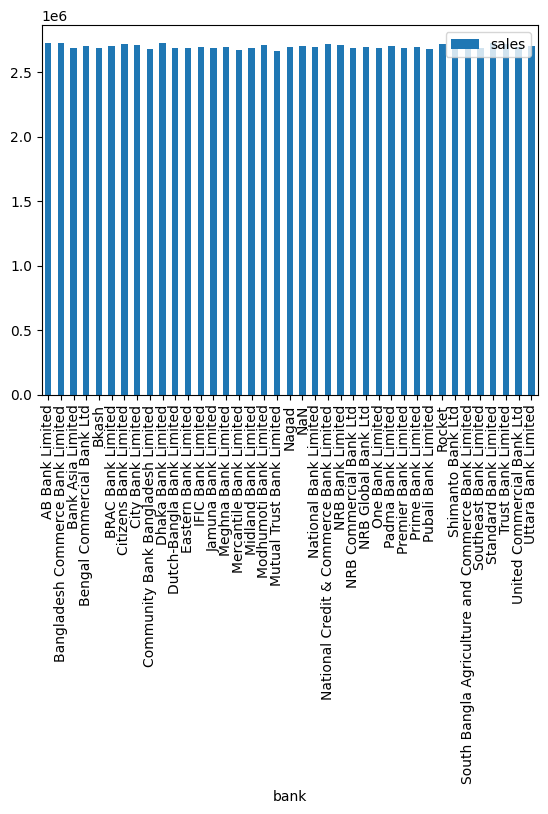

In [48]:
plt.figure(figsize=(10,5))
df_q2_2.plot.bar(y='sales')

# Q2.3: Find the transaction(cash/online)-wise total_sale_price joining fact table and respective dimension table

In [49]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.trans_type, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.trans_dim t on t.payment_key=f.payment_key " \
                "GROUP BY CUBE(t.trans_type) " \
                "ORDER BY t.trans_type " 
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [50]:
df_q2_3 = pd.DataFrame(records, columns=['transaction', 'sales'])
df_q2_3

,transaction,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


In [51]:
df_q2_3 = df_q2_3.drop(3)
df_q2_3

,transaction,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [52]:
df_q2_3 = df_q2_3.set_index(['transaction'])
df_q2_3

,sales
transaction,
card,94583038.50
cash,2708515.75
mobile,8109881.50


In [53]:
changetype(df_q2_3)
df_q2_3

,sales
transaction,
card,94583038.50
cash,2708515.75
mobile,8109881.50


<Axes: ylabel='sales'>

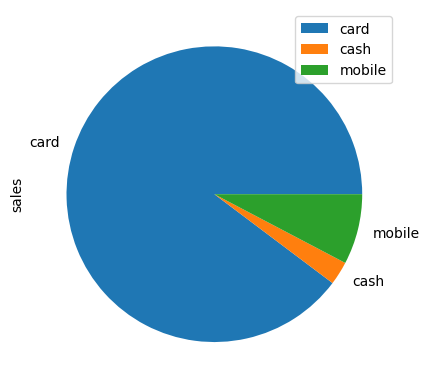

In [54]:
df_q2_3.plot.pie(y='sales')

<Axes: xlabel='transaction'>

<Figure size 1000x500 with 0 Axes>

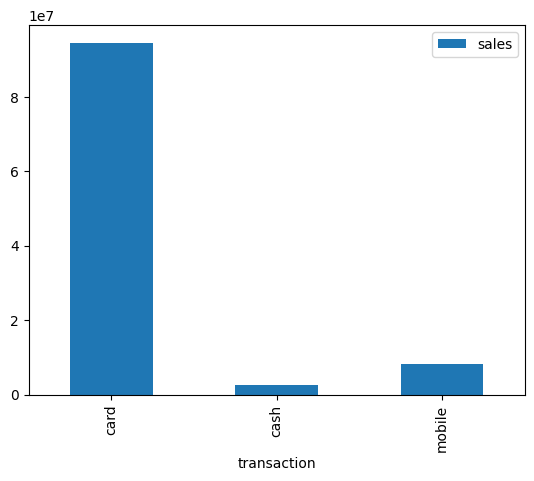

In [55]:
plt.figure(figsize=(10,5))
df_q2_3.plot.bar(y='sales')

# Q3: Find the total sales in Barishal 

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.store_dim s on s.store_key=f.store_key " \
                "WHERE s.district='BARISAL' " \
                "GROUP BY CUBE(s.district)  "  
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('2897237.75')), (None, Decimal('2897237.75'))]

In [57]:
df_q3 = pd.DataFrame(records, columns=['district', 'sales'])
df_q3 = df_q3.drop(1)
df_q3 = df_q3.set_index(['district'])
df_q3

,sales
district,
BARISAL,2897237.75


# Q4: Find the total sales in 2015 

In [58]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "WHERE t.year=2015 " \
                "GROUP BY CUBE(t.year) "  
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [59]:
df_q4= pd.DataFrame(records, columns=['year', 'sales'])
df_q4 = df_q4.drop(1)
df_q4 = df_q4.set_index(['year'])
df_q4

,sales
year,
2015.0,15095720.25


# Q5: Find the total sales in Barishal in 2015 

In [60]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, t.year, SUM(f.total_price) " \
                "FROM star_schema.fact_table f " \
                "INNER JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "INNER JOIN star_schema.store_dim s on s.store_key=f.store_key " \
                "WHERE t.year=2015 and s.district='BARISAL' " \
                "GROUP BY CUBE(t.year, s.district) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', 2015, Decimal('415748.75')),
 (None, 2015, Decimal('415748.75')),
 (None, None, Decimal('415748.75')),
 ('BARISAL', None, Decimal('415748.75'))]

In [61]:
df_q5= pd.DataFrame(records, columns=['district', 'year', 'sales'])
df_q5 = df_q5.drop(1)
df_q5 = df_q5.drop(2)
df_q5 = df_q5.drop(3)
df_q5 = df_q5.set_index(['district'])
df_q5

,year,sales
district,,
BARISAL,2015.0,415748.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key as store_key, i.item_name as item_name, sum(f.quantity) as quantity " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key "\
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key "\
                "GROUP BY CUBE (s.store_key, i.item_name)" \
                "ORDER BY s.store_key, quantity "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', "Reese's Peanutbutter Cups 2/pk", Decimal('4')),
 ('S0001', 'Tejava Unsweetened Black Tea 16.9oz', Decimal('4')),
 ('S0001', 'Perrier Flavors Sparkling Water 16.9oz', Decimal('5')),
 ('S0001', 'Dawn Ultra Dish Detergent, Original Scent ', Decimal('6')),
 ('S0001', 'Fresca Peach Citrus - 12 oz cans', Decimal('6')),
 ('S0001', 'Monster Zero Ultra 16 oz', Decimal('7')),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', Decimal('8')),
 ('S0001', 'Extra Variety Packs Sugar Free', Decimal('8')),
 ('S0001', 'Nabisco Classic Mix ccooki, cracker', Decimal('8')),
 ('S0001', 'M&M Peanut Butter 1.6 oz', Decimal('9')),
 ('S0001', 'Kleenex Tissue Rectangle Boxes 160/box', Decimal('9')),
 ('S0001', 'Wonderful Pistachios (in shell)', Decimal('9')),
 ('S0001', 'Ozarka Spring Water Mini 8oz', Decimal('9')),
 ('S0001', 'Diet Pepsi - 12 oz cans', Decimal('9')),
 ('S0001', 'Goldfish Pepperidge Farm Cheddar 1.5oz ', Decimal('10')),
 ('S0001', '100% Juice Box Variety 6.75 oz ', Decimal('10')),
 ('S000

In [10]:
df_q6 = pd.DataFrame(records, columns=['store', 'item', 'quantity'])
df_q6

,store,item,quantity
0,S0001,Reese's Peanutbutter Cups 2/pk,4
1,S0001,Tejava Unsweetened Black Tea 16.9oz,4
2,S0001,Perrier Flavors Sparkling Water 16.9oz,5
3,S0001,"Dawn Ultra Dish Detergent, Original Scent",6
4,S0001,Fresca Peach Citrus - 12 oz cans,6
...,...,...,...
188095,None,Diet Coke - 12 oz cans,45202
188096,None,Coke Classic 12 oz cans,45501
188097,None,Muscle Milk Protein Shake Van. 11oz,45665
188098,None,Pepsi - 12 oz cans,46837


In [12]:
df_q6 = df_q6.set_index(['store', 'item'])
df_q6

quantity
store item                                               
S0001 Reese's Peanutbutter Cups 2/pk                    4
      Tejava Unsweetened Black Tea 16.9oz               4
      Perrier Flavors Sparkling Water 16.9oz            5
      Dawn Ultra Dish Detergent, Original Scent         6
      Fresca Peach Citrus - 12 oz cans                  6
...                                                   ...
NaN   Sprite - 12 oz cans                           45140
      Diet Coke - 12 oz cans                        45202
      Coke Classic 12 oz cans                       45501
      Muscle Milk Protein Shake Van. 11oz           45665
      Pepsi - 12 oz cans                            46837

[188099 rows x 1 columns]

# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [15]:
number_of_days = input('Enter the number of days: ')

Enter the number of days: 1021


In [16]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, t.t_date " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.trans_dim trans ON trans.payment_key = f.payment_key " \
                "WHERE t.t_date > (CURRENT_DATE - INTERVAL '" + str(number_of_days) + " day') " \
                "AND (trans.trans_type = 'card' or trans.trans_type='mobile') "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Cheez It White Cheddar 1.5 oz', datetime.date(2021, 1, 9)),
 ('Hazelnut International Delight', datetime.date(2020, 10, 20)),
 ('Ice Breaker Mints Sugar Free ', datetime.date(2020, 8, 24)),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2020, 10, 18)),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2021, 1, 3)),
 ('Red Bull Sugar Free 8.4 oz', datetime.date(2020, 9, 13)),
 ("Kellogg's Cereals Assortment Pack ", datetime.date(2021, 1, 4)),
 ('Fresca Black Cherry - 12 oz cans', datetime.date(2020, 11, 2)),
 ('Sargento String Cheese 0.75oz', datetime.date(2020, 11, 2)),
 ('Brisk Lemon Iced Tea - 12 oz cans', datetime.date(2020, 10, 29)),
 ('Pure White Sugar Packets', datetime.date(2020, 10, 20)),
 ('Stirrers Coffee Stirs 7inch', datetime.date(2020, 10, 6)),
 ('K Cups - McCafe Premium Roast', datetime.date(2020, 8, 11)),
 ('Coffee-Mate French Vanilla Cold', datetime.date(2020, 8, 16)),
 ('Dole Fruit in Gel Cups 4.3 oz', datetime.date(2021, 1, 9)),
 ('Waterloo Sparkling Grapefruit 12oz', d

In [18]:
df_q7= pd.DataFrame(records, columns=['item', 'date'])
df_q7

,item,date
0,Cheez It White Cheddar 1.5 oz,2021-01-09
1,Hazelnut International Delight,2020-10-20
2,Ice Breaker Mints Sugar Free,2020-08-24
3,Coke Zero Sugar 12 oz cans,2020-10-18
4,Coke Zero Sugar 12 oz cans,2021-01-03
...,...,...
63859,Frito Big Grab Variety 1.5-2.0 oz,2020-11-13
63860,Cheez It White Cheddar 1.5 oz,2020-10-06
63861,Pop Chips Variety bags,2021-01-18
63862,Baked Chips Variety Mix Frito,2020-12-25


# Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [12]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name as item, t.quarter, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "GROUP BY CUBE(i.item_name, t.quarter) " \
                "ORDER BY i.item_name, sales "
cur.execute(select_stmt)

records_temp = cur.fetchall()

records = []
for i in range (0, 1300, 5):
    records.append(records_temp[i])
    
records.pop()

records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'Q1', Decimal('85470.0')),
 ('A&W Root Beer - 12 oz cans', 'Q2', Decimal('65952.5')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', Decimal('37725.75')),
 ('Advil 2 pill packets', 'Q1', Decimal('76342.0')),
 ('All Purpose Cleaner 409 Spray', 'Q1', Decimal('95850.0')),
 ('Altoids Small Packs Variety', 'Q3', Decimal('65592.0')),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'Q4', Decimal('78190.0')),
 ('AquaFina Purified Drinking Water 16oz', 'Q1', Decimal('47691.0')),
 ('Austin Cookie Cracker Variety', 'Q1', Decimal('78358.0')),
 ('Austin Toasty Crackers w/ PBtr', 'Q2', Decimal('73836.0')),
 ('Baked Chips Variety Mix Frito', 'Q2', Decimal('86896.0')),
 ("Barq's Root Beer - 12 oz cans", 'Q3', Decimal('37840.50')),
 ('Belvita Hard Biscuits Blueberry', 'Q4', Decimal('70005.0')),
 ('Belvita Hard Biscuits Cinnamon', 'Q1', Decimal('74100.0')),
 ('Belvita Protein Oats Soft Biscuit', 'Q3', Decimal('73024.0')),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q4', Decimal('3

In [28]:
df_q8= pd.DataFrame(records, columns=['item', 'quarter', 'sales'])
df_q8 = df_q8.set_index(['item'])
df_q8

,quarter,sales
item,,
100% Juice Box Variety 6.75 oz,Q1,85470.0
A&W Root Beer - 12 oz cans,Q2,65952.5
A&W Root Beer Diet - 12 oz cans,Q4,37725.75
Advil 2 pill packets,Q1,76342.0
All Purpose Cleaner 409 Spray,Q1,95850.0
...,...,...
Welch's 100% Juice Variety10 oz,Q2,93398.0
Wint O Green LifeSavers Sugar Free,Q1,85168.0
Wonderful Pistachios (in shell),Q1,122716.0


# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [49]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, s.division, SUM(f.total_price) as total_sales "\
                "FROM star_schema.fact_table f "\
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key "\
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key "\
                "GROUP BY CUBE(i.item_name, s.division) "\
                "ORDER BY i.item_name, s.division "
cur.execute(select_stmt)
records = cur.fetchall()

for r in records: 
    if r[0] == None or r[1] == None or r[0] == '':
        records.remove(r)

for i in range(0, 4, 1):
    records.pop()

records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W Root Beer - 12 oz cans', 'RAJSHAHI', Decimal('27795.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 ('A&W Root Beer Diet - 12 oz cans', 'BARISAL', Decimal('10118.25')

In [50]:
df_q9= pd.DataFrame(records, columns=['item', 'division', 'sales'])
df_q9 = df_q9.set_index(['item', 'division'])
df_q9

sales
item                            division            
100% Juice Box Variety 6.75 oz  BARISAL      23790.0
                                CHITTAGONG   64950.0
                                DHAKA       141195.0
                                KHULNA       37755.0
                                RAJSHAHI     38730.0
...                                              ...
Zoo Animal Cookies/Crackers     DHAKA       118286.0
                                KHULNA       35434.0
                                RAJSHAHI     37100.0
                                RANGPUR      25186.0
                                SYLHET       14728.0

[1813 rows x 1 columns]

# Q10: What are the average sales of products sales per store monthly?

     S1 -> M1 -> avg_sales

     S1 -> M2 -> avg_sales

In [54]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, t.month, AVG(f.total_price) as average_price "\
                "FROM star_schema.fact_table f "\
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key "\
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "GROUP BY CUBE(s.store_key, t.month) "\
                "ORDER BY s.store_key, t.month "
cur.execute(select_stmt)
records = cur.fetchall()

for r in records:
    if r[1] == None:
        records.remove(r)
        
for i in range (0, 12, 1):
    records.pop()

records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355372')),
 ('S0002', 9, Decimal('104.7039473684210526

In [55]:
df_q10= pd.DataFrame(records, columns=['store', 'month', 'average sales'])
df_q10 = df_q10.set_index(['store', 'month'])
df_q10

average sales
store month                      
S0001 1       97.7543103448275862
      2      100.5776699029126214
      3      109.4158878504672897
      4       98.8805309734513274
      5       99.5245535714285714
...                           ...
S0099 8       96.2933673469387755
      9      114.1365740740740741
      10     102.7897727272727273
      11     107.3810679611650485
      12     102.9014423076923077

[8712 rows x 1 columns]

# Custom Analytics

# 1. store and time dimensional financial analytics

# 1.1. Total sales for each store by year in an ascending order

In [49]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key as store, t.year, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key " \
                "GROUP BY CUBE(s.store_key, t.year) " \
                "ORDER BY s.store_key, t.year, sales "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_1_1 = pd.DataFrame(records, columns=['store', 'year', 'sales'])
df_cq_1_1 = df_cq_1_1.set_index(['store', 'year'])

df_cq_1_1

successfully connected to database


sales
store year                
S0001 2014.0      17605.25
      2015.0      19676.50
      2016.0      18843.75
      2017.0      19681.50
      2018.0      21689.25
...                    ...
NaN   2018.0   15108197.25
      2019.0   14949510.25
      2020.0   15037190.25
      2021.0     883772.25
      NaN     105401435.75

[6543 rows x 1 columns]

# 1.2. Total sales for each district during COVID (2020-2021)

In [19]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district as district, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key " \
                "WHERE t.year = 2020 OR t.year = 2021 " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY sales "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_1_2 = pd.DataFrame(records, columns=['district', 'sales'])
df_cq_1_2 = df_cq_1_2.set_index(['district', 'sales'])

df_cq_1_2

successfully connected to database


,
district,sales
MEHERPUR,65383.50
NARAIL,66041.50
CHUADANGA,78797.00
JHALOKATI,86699.00
MAGURA,88290.75
...,...
RAJSHAHI,571607.50
KHULNA,615321.00
CHITTAGONG,1092469.50


# 2. customer and time dimensional financial analytics

# 2.1. Total money spent by each customer during COVID in a descending order

In [29]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.customer_key as customer_id, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.customer_dim c ON c.customer_key = f.customer_key " \
                "WHERE t.year = 2020 OR t.year = 2021 " \
                "GROUP BY CUBE(c.customer_key) " \
                "ORDER BY sales DESC "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_2_1 = pd.DataFrame(records, columns=['customer_id', 'sales'])
df_cq_2_1 = df_cq_2_1.set_index(['customer_id'])

df_cq_2_1

successfully connected to database


,sales
customer_id,
None,15920962.50
C001438,4890.5
C002136,4000.0
C006265,3988.50
C003112,3978.75
...,...
C001744,348.0
C007169,342.00
C001912,307.0


# 2.2 Total yearly expense by a customer by years

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.customer_key as customer_id, t.year, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.customer_dim c ON c.customer_key = f.customer_key " \
                "GROUP BY CUBE(c.customer_key, t.year) " \
                "ORDER BY c.customer_key, sales "
cur.execute(select_stmt)
records= cur.fetchall()

df_cq_2_2 = pd.DataFrame(records, columns=['customer_id', 'year', 'sales'])
df_cq_2_2 = df_cq_2_2.set_index(['customer_id', 'year'])

df_cq_2_2

successfully connected to database


sales
customer_id year                
C000001     2021.0         154.0
            2020.0        481.75
            2019.0         767.0
            2018.0        1050.0
            2016.0        1105.5
...                          ...
NaN         2017.0   15015806.00
            2020.0   15037190.25
            2015.0   15095720.25
            2018.0   15108197.25
            NaN     105401435.75

[79045 rows x 1 columns]

# 3. item and time dimensional financial analytics

# 3.1. Total sales by item during COVID in a descending order

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_key as item, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "WHERE t.year = 2020 OR t.year = 2021 " \
                "GROUP BY CUBE(i.item_key) " \
                "ORDER BY sales DESC "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_3_1 = pd.DataFrame(records, columns=['item', 'sales'])
df_cq_3_1 = df_cq_3_1.set_index(['item'])

df_cq_3_1

successfully connected to database


,sales
item,
None,15920962.50
I00061,203060.0
I00115,188521.0
I00119,178027.0
I00117,168360.0
...,...
I00026,22835.25
I00028,22524.75
I00019,22403.25


# 3.2. Totals sales for each item by manufacturing country during COVID

In [48]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_key as item, i.man_country, SUM(f.total_price) as sales " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "WHERE t.year = 2020 OR t.year = 2021 " \
                "GROUP BY CUBE(i.item_key, i.man_country) " \
                "ORDER BY i.item_key, sales "
cur.execute(select_stmt)
records= cur.fetchall()

df_cq_3_2 = pd.DataFrame(records, columns=['item', 'man_country', 'sales'])
df_cq_3_2 = df_cq_3_2.set_index(['item', 'man_country'])

df_cq_3_2

successfully connected to database


sales
item   man_country             
I00001 Netherlands      39801.5
       NaN              39801.5
I00002 poland          24111.00
       NaN             24111.00
I00003 NaN             23463.00
...                         ...
NaN    Germany       1666821.25
       Lithuania     1754704.25
       Bangladesh    2011030.50
       India         2012913.75
       NaN          15920962.50

[539 rows x 1 columns]

# 4. store and time dimensional inventory analytics

# 4.1. Shops with least amount of items sold during the past 5 years

In [51]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key as store, SUM(f.quantity) as quantity " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key " \
                "WHERE t.year >= 2017 AND t.year <= 2021 " \
                "GROUP BY CUBE(s.store_key) " \
                "ORDER BY quantity, s.store_key "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_4_1 = pd.DataFrame(records, columns=['store', 'quantity'])
df_cq_4_1 = df_cq_4_1.set_index(['store'])

df_cq_4_1

successfully connected to database


,quantity
store,
S00550,4265
S00633,4267
S00359,4274
S00686,4276
S00143,4281
...,...
S00197,5303
S00601,5336
S00340,5371


# 4.2. Districts with highest amount of items sold during the past 5 years

In [53]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district as district, SUM(f.quantity) as quantity " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.store_dim s ON s.store_key = f.store_key " \
                "WHERE t.year >= 2017 AND t.year <= 2021 " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY quantity DESC "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_4_2 = pd.DataFrame(records, columns=['district', 'quantity'])
df_cq_4_2 = df_cq_4_2.set_index(['district'])

df_cq_4_2

successfully connected to database


,quantity
district,
None,3472213
DHAKA,776452
CHITTAGONG,240969
KHULNA,133741
RAJSHAHI,124466
...,...
MADARIPUR,18907
JHALOKATI,18839
CHUADANGA,18622


# 5. item and time dimensional inventory analytics

# 5.1.  Least sold items during the past 5 years

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_key as item, SUM(f.quantity) as quantity " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "WHERE t.year >= 2017 AND t.year <= 2021 " \
                "GROUP BY CUBE(i.item_key) " \
                "ORDER BY quantity "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_5_1 = pd.DataFrame(records, columns=['item', 'quantity'])
df_cq_5_1 = df_cq_5_1.set_index(['item'])

df_cq_5_1

successfully connected to database


,quantity
item,
I00168,12261
I00141,12448
I00195,12466
I00107,12470
I00068,12504
...,...
I00110,13899
I00193,13901
I00015,14113


# 5.2 Items sold by type (cans, bottles...) during the past 5 years

In [59]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.unit as type, SUM(f.quantity) as quantity " \
                "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim t ON t.time_key = f.time_key " \
                "JOIN star_schema.item_dim i ON i.item_key = f.item_key " \
                "WHERE t.year >= 2017 AND t.year <= 2021 " \
                "GROUP BY CUBE(i.unit) " \
                "ORDER BY quantity "
cur.execute(select_stmt)
records = cur.fetchall()

df_cq_5_2 = pd.DataFrame(records, columns=['unit', 'quantity'])
df_cq_5_2 = df_cq_5_2.set_index(['unit'])

df_cq_5_2

successfully connected to database


,quantity
unit,
botlltes,12686
lb,12699
NaN,12819
oz.,12867
tins,13209
cartons,13501
Ct,26406
rolls,26716
tubs,39091
